# importing the libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Overview

In [3]:
x=pd.read_excel("C:\\internship companies resume and projects\\plasmid\\onlineretail_dataset.xlsx")
x.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
x.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
x.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Data processing

In [7]:
x.dropna(subset=['CustomerID','Description'],inplace=True)

In [8]:
x.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
x['InvoiceDate']=pd.to_datetime(x['InvoiceDate'])

In [10]:
x['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [11]:
x=x[x['Quantity']>0]
x=x[x['UnitPrice']>0]

In [12]:
x=x.drop_duplicates()

In [13]:
x['Total_price']=x['Quantity']*x['UnitPrice']

In [14]:
x['Description']=x['Description'].str.lower()

In [15]:
print(x.shape)


(392692, 9)


In [16]:
print(x.info())


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Total_price  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
None


In [17]:
x=x[x['Total_price']>0.01]

In [18]:
x.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_price
count,392688.000000,392688,392688.000000,392688.000000,392688.00000
mean,13.119825,2011-07-10 19:12:49.301276928,3.125946,15287.848903,22.63173
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000,0.06000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.95000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.45000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.80000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.60000
std,180.493747,NaN,22.241947,1713.543619,311.10080


# Exploratory data analysis

# 1.Top 10 globally most purchased products

In [19]:
top_10_products=x.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

In [20]:
top_10_products

Description
paper craft , little birdie           80995
medium ceramic top storage jar        77916
world war 2 gliders asstd designs     54319
jumbo bag red retrospot               46078
white hanging heart t-light holder    36706
assorted colour bird ornament         35263
pack of 72 retrospot cake cases       33670
popcorn holder                        30919
rabbit night light                    27153
mini paint set vintage                26076
Name: Quantity, dtype: int64

Text(0, 0.5, 'quantity sold')

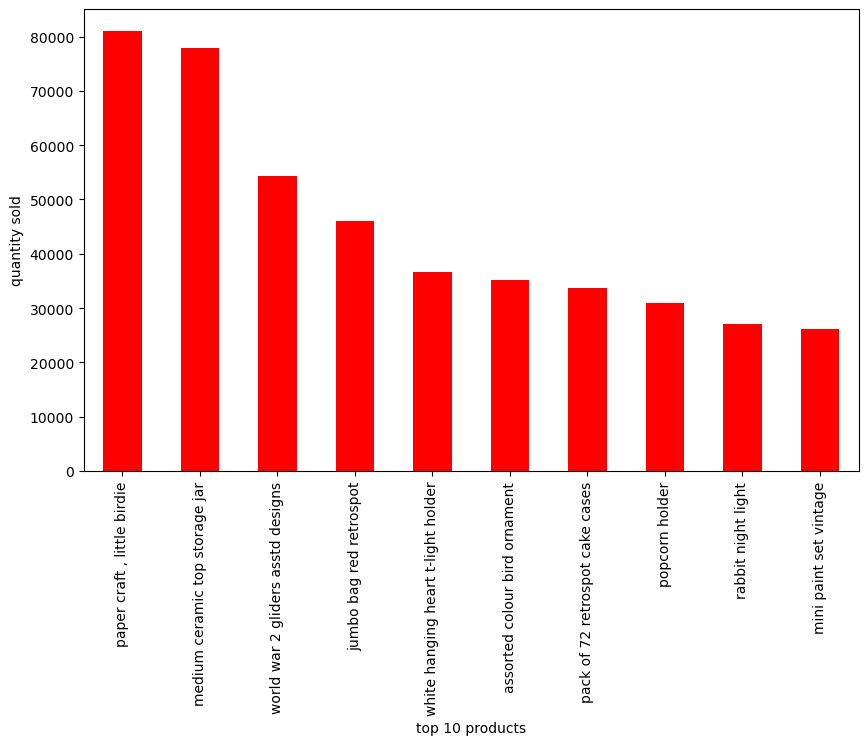

In [21]:
plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar',color='red')
plt.xlabel("top 10 products")
plt.ylabel("quantity sold")

# Top Products by Country


 Top Products in United Kingdom
Description
paper craft , little birdie           80995
medium ceramic top storage jar        76919
world war 2 gliders asstd designs     49086
jumbo bag red retrospot               41878
white hanging heart t-light holder    34630
assorted colour bird ornament         32628
popcorn holder                        28923
pack of 12 london tissues             24321
brocade ring purse                    22675
pack of 72 retrospot cake cases       22442
Name: Quantity, dtype: int64


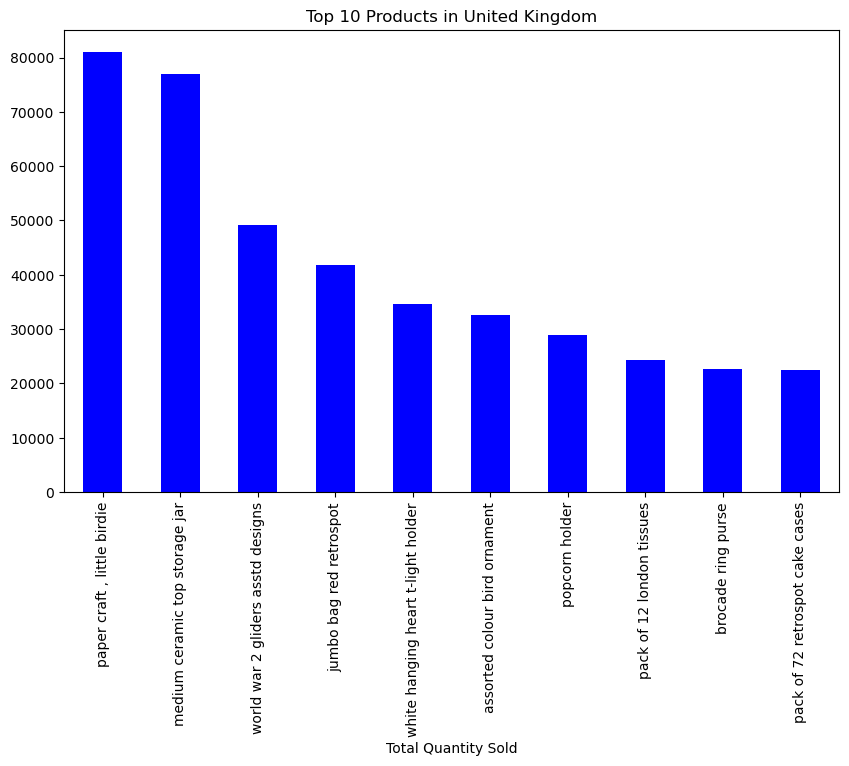

In [22]:
def get_country_popular(country_name, top_n=10):
    country_df = x[x['Country'] == country_name]
    return country_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(top_n)

# Example: UK
country_name = 'United Kingdom'
country_popular = get_country_popular(country_name)

print(f"\n Top Products in {country_name}")
print(country_popular)

# Plot
plt.figure(figsize=(10, 6))
country_popular.plot(kind='bar', color='BLUE')
plt.title(f"Top 10 Products in {country_name}")
plt.xlabel("Total Quantity Sold")

plt.show()

# Top Products by Month

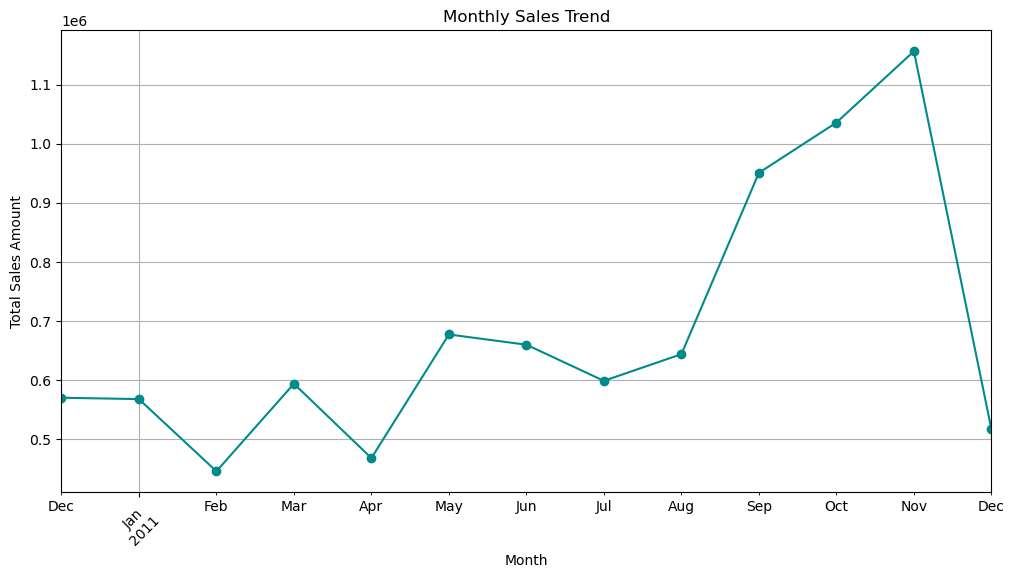

In [23]:
x['InvoiceMonth'] = x['InvoiceDate'].dt.to_period('M')
monthly_sales = x.groupby('InvoiceMonth')['Total_price'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='darkcyan')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Top customers by total purchases

In [24]:
top_customers=x.groupby('CustomerID')['InvoiceDate'].count().sort_values(ascending=False).head(10)

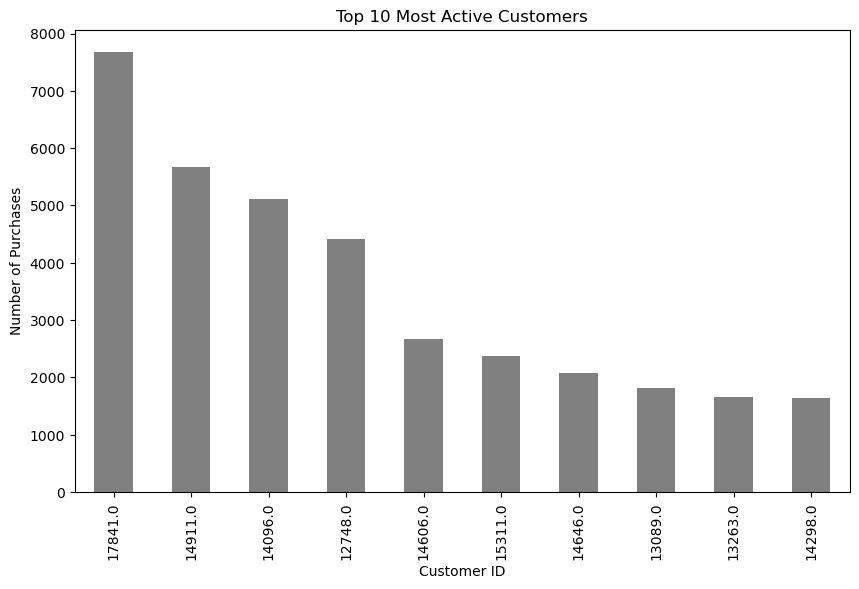

In [25]:
plt.figure(figsize=(10,6))
top_customers.plot(kind='bar', color='grey')
plt.title('Top 10 Most Active Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.show()

# Top 10 Countries on No of Transactions

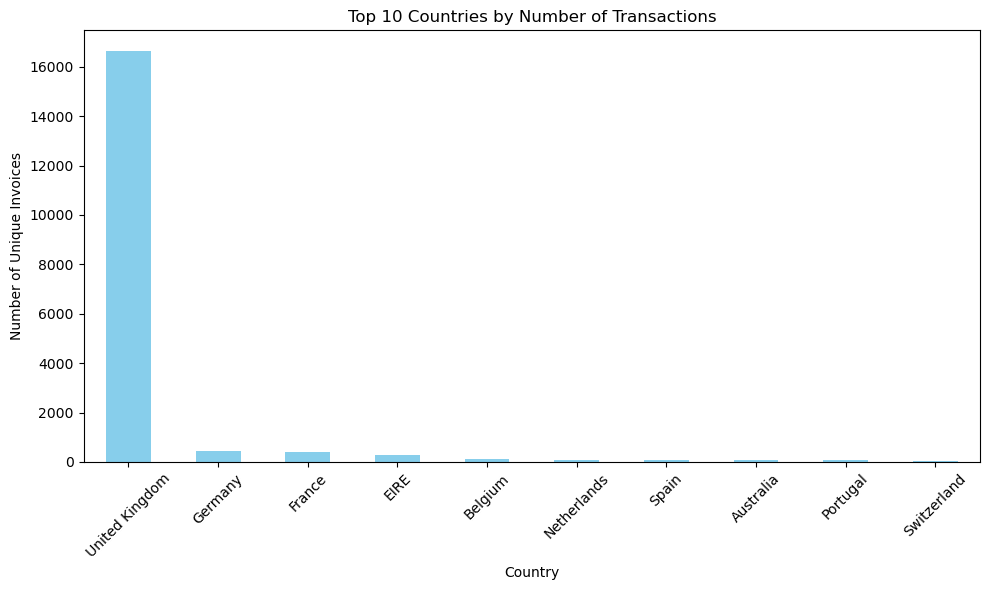

In [27]:
country_transactions = x.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
country_transactions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Unique Invoices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly sales Trend

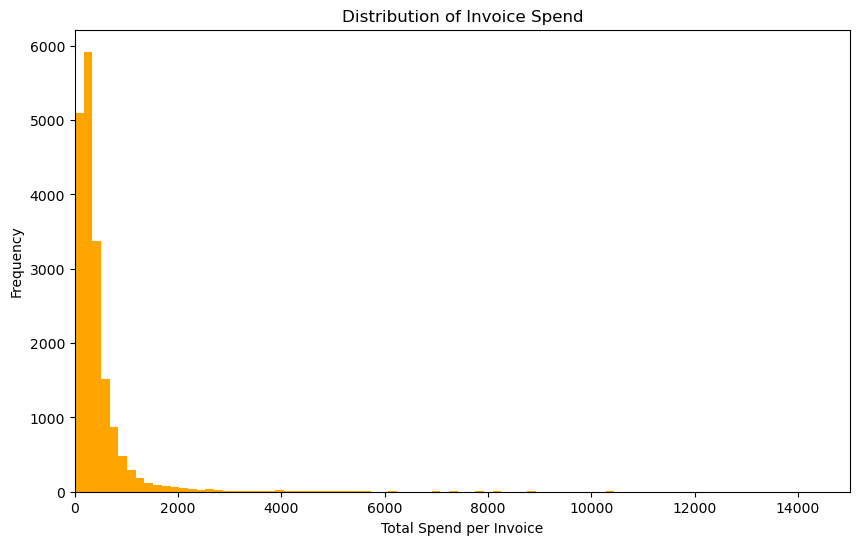

In [28]:
invoice_spend = x.groupby('InvoiceNo')['Total_price'].sum()
plt.figure(figsize=(10,6))
invoice_spend.plot(kind='hist', bins=1000, color='orange')
plt.title('Distribution of Invoice Spend')
plt.xlabel('Total Spend per Invoice')
plt.xlim(0,15000)
plt.ylabel('Frequency')
plt.show()

# recommendation models (funtions to analyaze and print recommendations)

# 1.Popularity-Based Recommendation

In [29]:
popular_products = x.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(popular_products)

Description
paper craft , little birdie           80995
medium ceramic top storage jar        77916
world war 2 gliders asstd designs     54319
jumbo bag red retrospot               46078
white hanging heart t-light holder    36706
assorted colour bird ornament         35263
pack of 72 retrospot cake cases       33670
popcorn holder                        30919
rabbit night light                    27153
mini paint set vintage                26076
Name: Quantity, dtype: int64


# 2.Item Based Collaborative Filtering

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
user_item_matrix = x.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)
item_similarity = cosine_similarity(user_item_matrix.T)
item_sim_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
def get_similar_items(product_name, top_n=5):
    similar_scores = item_sim_df[product_name].sort_values(ascending=False)[1:top_n+1]
    return similar_scores
print(get_similar_items('medium ceramic top storage jar'))

Description
large ceramic top storage jar    0.003543
wrap, billboard fonts design     0.002804
spaceboy gift wrap               0.002673
travel sewing kit                0.002628
plasters in tin spaceboy         0.002582
Name: medium ceramic top storage jar, dtype: float64


# 3.Content-Based Filtering (TF-IDF)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
product_data = x[['StockCode', 'Description']].drop_duplicates()
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(product_data['Description'])
content_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
content_sim_df = pd.DataFrame(content_sim_matrix, index=product_data['Description'], columns=product_data['Description'])
def get_content_similar_items(product_name, top_n=5):
    similar = content_sim_df[product_name].sort_values(ascending=False)[1:top_n+1]
    return similar

In [32]:
print(get_content_similar_items('large ceramic top storage jar'))

Description
small ceramic top storage jar     0.821231
medium ceramic top storage jar    0.754380
red retrospot storage jar         0.600755
glass  songbird storage jar       0.499881
glass songbird storage jar        0.499881
Name: large ceramic top storage jar, dtype: float64


# 4.Matrix Factorization (SVD)

In [33]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

svd_df = x[['CustomerID', 'Description', 'Quantity']].copy()
svd_df['CustomerID'] = svd_df['CustomerID'].astype(str)
svd_df['Description'] = svd_df['Description'].astype(str)
reader = Reader(rating_scale=(0, svd_df['Quantity'].max()))
data = Dataset.load_from_df(svd_df[['CustomerID', 'Description', 'Quantity']], reader)

trainset, testset = train_test_split(data, test_size=0.2)
model = SVD()
model.fit(trainset)

predictions = model.test(testset)

rmse = accuracy.rmse(predictions)

def recommend_svd_for_user(user_id, top_n=5):
    all_items = x['Description'].unique()
    user_items = x[x['CustomerID'] == user_id]['Description'].unique()
    items_to_predict = [item for item in all_items if item not in user_items]

    pred_ratings = [(item, model.predict(str(user_id), str(item)).est) for item in items_to_predict]
    pred_ratings.sort(key=lambda x: x[1], reverse=True)

    return pred_ratings[:top_n]

RMSE: 80981.8131


In [34]:
cus_id=float(input("customer id"))
result=recommend_svd_for_user(cus_id)
result_df=pd.DataFrame(result)
print("the items recomended for id:",cus_id,result_df)

customer id 17481.0


the items recomended for id: 17481.0                                      0      1
0   white hanging heart t-light holder  80995
1                  white metal lantern  80995
2       cream cupid hearts coat hanger  80995
3  knitted union flag hot water bottle  80995
4       red woolly hottie white heart.  80995


# 5.Hybrid recommendation system

In [37]:
def hybrid_recommend(user_id, top_n=5):
    user_id = str(user_id)
    recommendations = {}
    popular_products = x.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

    # Store the top product names in a list
    top_popular = popular_products.index.tolist()
    # Get user history
    if user_id in x['CustomerID'].astype(str).unique():
        # User's previously purchased items
        user_history = x[x['CustomerID'].astype(str) == user_id]['Description'].unique()

        # 1. Item-Based CF: similar items to those in user history
        item_scores = {}
        for item in user_history:
            if item in item_sim_df:
                similar_items = get_similar_items(item, top_n=top_n)
                for sim_item, score in similar_items.items():
                    item_scores[sim_item] = item_scores.get(sim_item, 0) + score

        # Normalize item-based scores
        for key in item_scores:
            item_scores[key] /= len(user_history)

        # 2. Content-Based: similar items by description
        content_scores = {}
        for item in user_history:
            if item in content_sim_df:
                similar_items = get_content_similar_items(item, top_n=top_n)
                for sim_item, score in similar_items.items():
                    content_scores[sim_item] = content_scores.get(sim_item, 0) + score

        # Normalize content-based scores
        for key in content_scores:
            content_scores[key] /= len(user_history)

        # 3. SVD Predictions
        svd_preds = recommend_svd_for_user(user_id, top_n=top_n*2)
        svd_scores = {desc: rating for desc, rating in svd_preds}

        # 4. Popularity Score (fixed score to ensure fallback)
        pop_scores = {item: 1.0 for item in top_popular}

        # Combine all scores using weights
        all_items = set(item_scores) | set(content_scores) | set(svd_scores) | set(pop_scores)

        for item in all_items:
            score = (
                0.3 * item_scores.get(item, 0) +
                0.2 * content_scores.get(item, 0) +
                0.4 * svd_scores.get(item, 0) +
                0.1 * pop_scores.get(item, 0)
            )
            recommendations[item] = score

        # Sort final recommendations
        final_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
        return final_recommendations[:top_n]

    else:
        # For new users with no history, recommend popular + content-based similar items to top products
        recs = set()
        for prod in top_popular:
            recs.add(prod)
            similar = get_content_similar_items(prod, top_n=2)
            recs.update(similar.index)

        return list(recs)[:top_n]


In [38]:
result_hybrid=hybrid_recommend(user_id=17850, top_n=5)
result_hybrid_df=pd.DataFrame(result_hybrid)
result_hybrid_df


,0
0,paint your own eggs in crate
1,red toadstool led night light
2,mini paint set vintage
3,pack of 72 retrospot cake cases
4,fairy tale cottage night light


# evaluation of hybrid method

# Precision@K and Recall@K

In [39]:
def precision_at_k(recommended, relevant, k=5):
    recommended_k = recommended[:k]
    hits = len(set(recommended_k) & set(relevant))
    return hits / k

def recall_at_k(recommended, relevant, k=5):
    recommended_k = recommended[:k]
    hits = len(set(recommended_k) & set(relevant))
    return hits / len(relevant) if relevant else 0

In [40]:
def evaluate_hybrid_model(user_id, top_n=5):
    user_id = str(user_id)
    user_data = x[x['CustomerID'] == user_id]
    
    if len(user_data) < 5:
        return "Not enough data for evaluation."

    # Simulate train-test split
    purchased_items = user_data['Description'].unique()
    split_idx = int(0.8 * len(purchased_items))
    train_items = purchased_items[:split_idx]
    test_items = purchased_items[split_idx:]

    # Simulate by filtering df to only include train items
    df_train_sim = x[(x['CustomerID'] == user_id) & (x['Description'].isin(train_items))]
    
    # Predict using full df (real scenario) but evaluate using split
    recommendations = hybrid_recommend(user_id=user_id, top_n=top_n)
    recommended_items = [item for item, _ in recommendations]

    # Calculate metrics
    prec = precision_at_k(recommended_items, test_items, k=top_n)
    rec = recall_at_k(recommended_items, test_items, k=top_n)

    return {
        "User": user_id,
        "Precision@{}".format(top_n): round(prec, 2),
        "Recall@{}".format(top_n): round(rec, 2),
        "Test Items": test_items.tolist(),
        "Recommendations": recommended_items
    }


In [41]:
evaluate_hybrid_model("17850", top_n=5)


'Not enough data for evaluation.'